<h1 style="text-align: center; color: purple;" markdown="1">Econ 320: Final Project </h1>


<h2 style="text-align: center; color: #012169" markdown="1">Wendy Chen, Kristina Gong, Xiuyi Qian, Yao Zhang</h2>

## Package setup

In [1]:
import wooldridge as woo
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats as stats
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
import statsmodels.stats.outliers_influence as smo
import patsy as pt

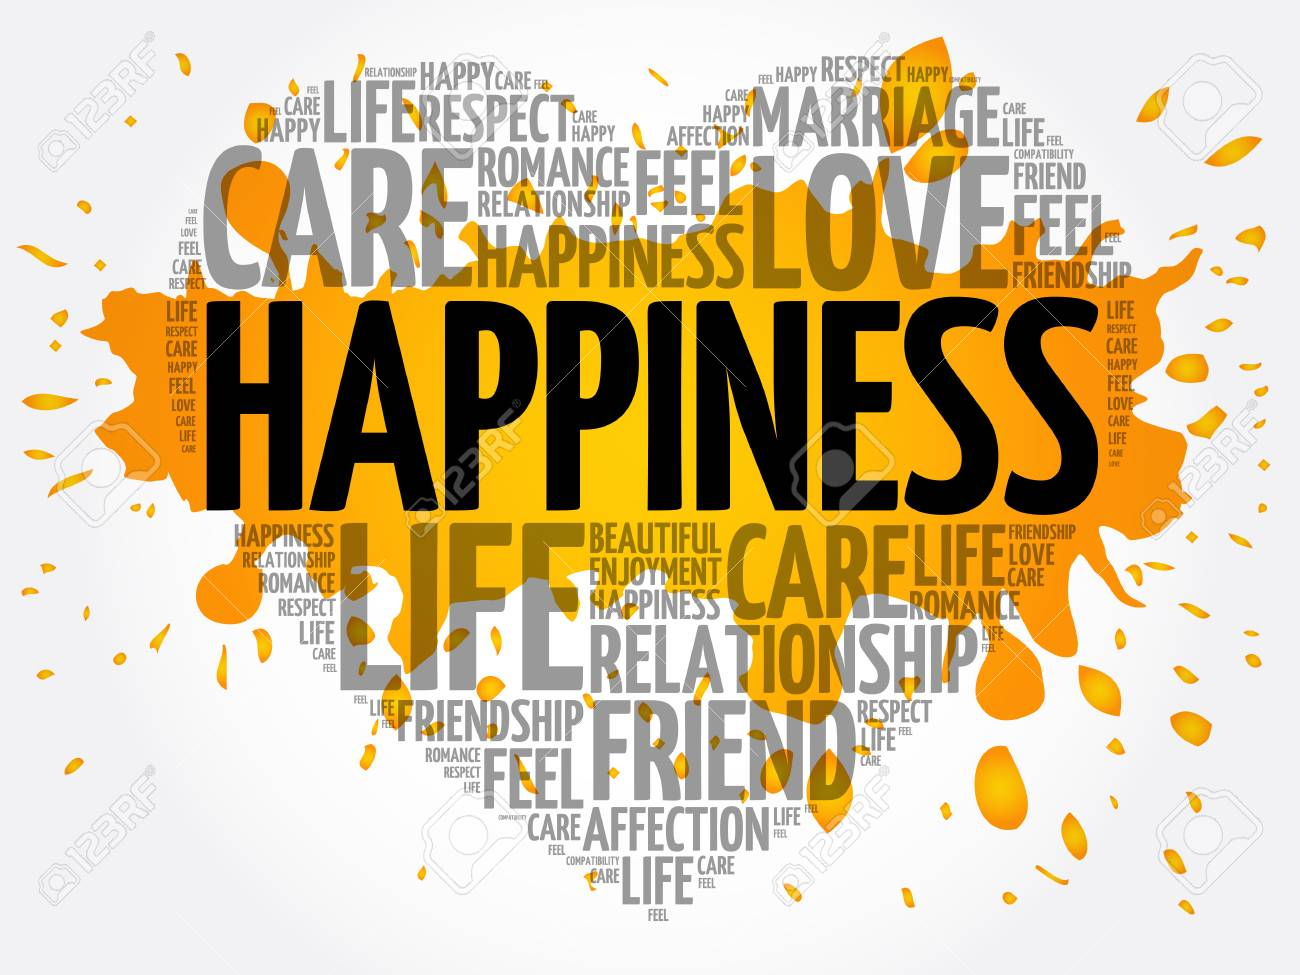

## Introduction and Motivation

In this project, we expect to study how a country’s happiness level can be predicted by variables, including individual level of freedom, generosity, GDP per Capita, and government corruption. It is interesting because national happiness level is significant in evalution of a nation wellness and statisfaction its citizens enjoy. We expect to conduct a similar evalution by testing what exactly the variables are that have such huge effects in determining citizens' happiness level. To achieve this, we expect to use the dataset "Happiness2017" with the assistance of regression model to test the effects of each variable.

The regression model that we developed contains numerous variables, some of which had been tested by previous literatures. As literature, “The Most Influential Factor in Determining the Happiness of Nations“, by Julie Lang, indicates, low corruption, low unemployment rate and a high HPI number are effective at predicting happiness level within a country. Departing from this recognization, we develop our model incorporating government corruption as a key variable in predicting national happiness level. 

<h3 style="text-align: center" markdown="1">Figure 1: Data Statistics from Julie Lang's Study </h3>

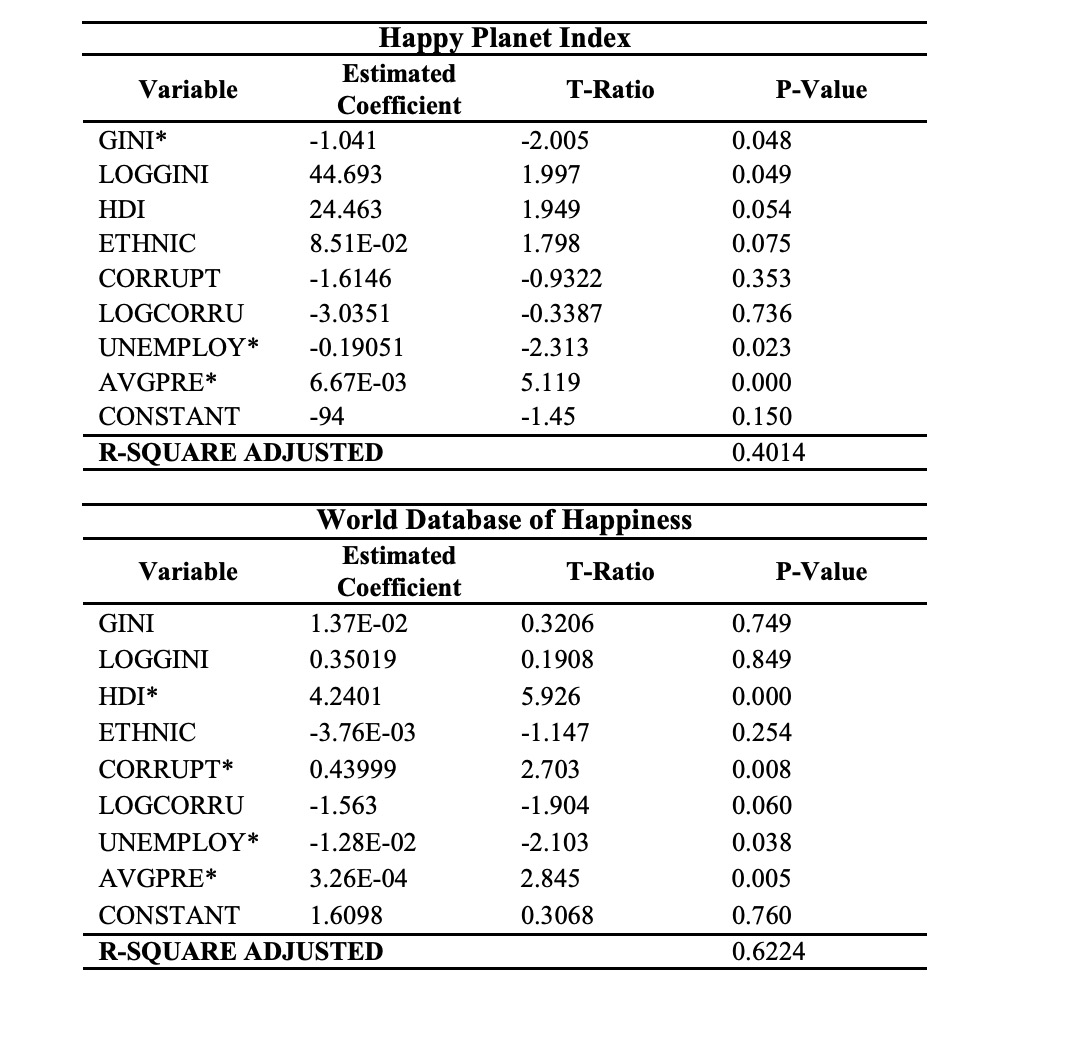

Here is a table from external source which supports our motivation and purpose of the study. 

In [2]:
happiness = pd.read_csv("/Users/gongxiaoyun/大二下/320 lab/python/final project/Happiness2017.csv")

In [3]:
cormat = happiness[["Happiness Score","GDP per Capita","Family","Life Expectancy","Freedom","Generosity","Government Corruption"]]
cormat.corr().round(decimals=2)

,Happiness Score,GDP per Capita,Family,Life Expectancy,Freedom,Generosity,Government Corruption
Happiness Score,1.00,0.81,0.75,0.78,0.57,0.16,0.43
GDP per Capita,0.81,1.00,0.69,0.84,0.37,-0.02,0.35
Family,0.75,0.69,1.00,0.61,0.42,0.05,0.23
Life Expectancy,0.78,0.84,0.61,1.00,0.35,0.06,0.28
Freedom,0.57,0.37,0.42,0.35,1.00,0.32,0.50
Generosity,0.16,-0.02,0.05,0.06,0.32,1.00,0.29
Government Corruption,0.43,0.35,0.23,0.28,0.50,0.29,1.00


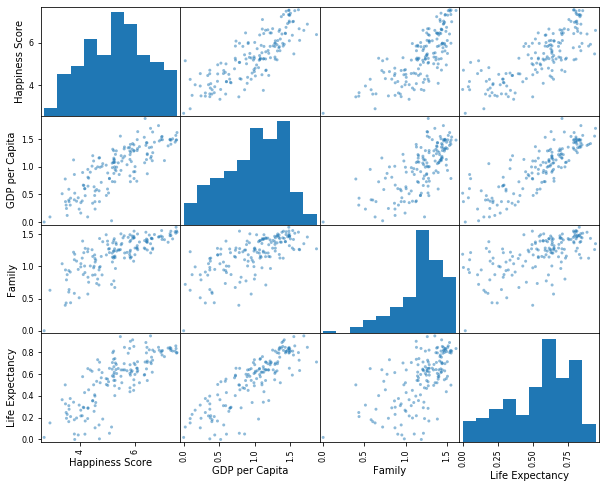

In [4]:
newcormat = happiness[["Happiness Score","GDP per Capita","Family","Life Expectancy"]]
pd.plotting.scatter_matrix(newcormat, alpha=0.5, figsize=(10, 8));

## Data

This dataset records the happiness scores over 154 nations around the world. It includes individual level factors, such as life Expectance, as well as social factors, such as Government corruption.

In [5]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                155 non-null    object 
 1   Happiness Rank         155 non-null    int64  
 2   Happiness Score        155 non-null    float64
 3   Whisker high           155 non-null    float64
 4   Whisker low            155 non-null    float64
 5   GDP per Capita         155 non-null    float64
 6   Family                 155 non-null    float64
 7   Life Expectancy        155 non-null    float64
 8   Freedom                155 non-null    float64
 9   Generosity             155 non-null    float64
 10  Government Corruption  155 non-null    float64
 11  Dystopia / Residual    155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.7+ KB


This data set contains happiness information from 155 countries. It involves 6 aspects ranging from personal factors to social factors.

In [6]:
happiness.head()

,Country,Happiness Rank,Happiness Score,Whisker high,Whisker low,GDP per Capita,Family,Life Expectancy,Freedom,Generosity,Government Corruption,Dystopia / Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [7]:
happiness.describe()

,Happiness Rank,Happiness Score,Whisker high,Whisker low,GDP per Capita,Family,Life Expectancy,Freedom,Generosity,Government Corruption,Dystopia / Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


By using the `describe()` method, we observe that the data has the following characteristics:

* This data contains the data adjusted from the raw data. For instance, happiness score is the average value of the raw happiness scores imposed by the sufficient population of the surveyed.
* The whisker high is the largest happiness score smaller than 1.5IQR above the third quartile.
* The whisker low is the smallest happiness score larger than 1.5IQR below the first quartile.
* Dystopia/Residual is the score of the country that has a lower rank than the lowest ranking country on the report, plus the residual value of each country.

## Methodology/Empirical Model

* Our proposed economic model should look like:

$ Happiness = Wealthiness + Healthiness + Social$ $Relationship$ + $Optimism$ + $mental state$

Motivated by the visualization generated at the *Introduction and Motivation* session, where by the correlation matrix we found that GDP per Capita, Family, Life Expectancy, Freedom, Generosity and Government Corruption all have certain extent of correlation with happiness score, we decided to incorporate those variables into our econometric model.

* We propose the econometric model to be a regression model. 

$$ Happiness Score = \beta_0 +\beta_1 GDP per Capita + \beta_2 Family + \beta_3 life Expectancy + \beta_4 Freedom + \beta_5 Generosity + \beta_6 Government Corruption + u$$ 

Because we want to evaluate the effect of independent variables on the dependent variable, and linear multiple regression model can help us identify the extent of the regressors in a numerical format. 
The GDP per Capita measures wealthiness, family and government corruption measures social relationship, life expectancy is the combination of optimism and healthiness, and freedom and generosity are indicators of mental state.

### GDP per Capita and Life Expectancy

From the scatterplot matrix we found that GDP per Capita and Life Expectancy have a relative strong correlation. Therefore we include their interaction term in the model and try to examine the effect.

In [8]:
happiness.columns = happiness.columns.str.replace(' ','_')
m1 = smf.ols(formula="Happiness_Score ~ GDP_per_Capita + Family + Life_Expectancy + Freedom + Generosity + Government_Corruption", 
             data=happiness).fit()

In [9]:
# model with the interaction term between GDP per Capita and Life Expectancy
m2 = smf.ols(formula="Happiness_Score ~ GDP_per_Capita*Life_Expectancy + Family + Freedom + Generosity + Government_Corruption", 
             data=happiness).fit()

In [10]:
# Create a new categorical variable from GDP per Capita
gdpg = [0, 
        np.percentile(happiness["GDP_per_Capita"],25), 
        happiness["GDP_per_Capita"].median(), 
        np.percentile(happiness["GDP_per_Capita"],75),
        happiness["GDP_per_Capita"].max()] # the cutting points

happiness['GDP_g'] = pd.cut(happiness["GDP_per_Capita"], bins = gdpg,
                        labels=['0-25 percentile', '25-50 percentile', '50-75 percentile', '75-100 percentile'])

In [11]:
# model with the catagorized GDP per Capita
m3 = smf.ols(formula="Happiness_Score ~ C(GDP_g, Treatment('0-25 percentile')) + Life_Expectancy + Family + Freedom + Generosity + Government_Corruption", 
             data=happiness).fit()

In [12]:
# model with the interaction term between the catagorized GDP per Capita and Life Expectancy
m4 = smf.ols(formula="Happiness_Score ~ C(GDP_g, Treatment('0-25 percentile')) * Life_Expectancy + Family + Freedom + Generosity + Government_Corruption", 
             data=happiness).fit()

In [13]:
st=Stargazer([m1,m2,m3,m4])
from IPython.core.display import HTML
st.rename_covariates({"C(GDP_g, Treatment('0-25 percentile'))[T.25-50 percentile]":"25-50 percentile GDP per capita",
                    "C(GDP_g, Treatment('0-25 percentile'))[T.25-50 percentile]:Life_Expectancy":"25-50 percentile GDP per capita: Life Expectancy",
                    "C(GDP_g, Treatment('0-25 percentile'))[T.50-75 percentile]":"50-75 percentile GDP per capita",
                    "C(GDP_g, Treatment('0-25 percentile'))[T.50-75 percentile]:Life_Expectancy":"50-75 percentile GDP per capita: Life Expectancy",
                    "C(GDP_g, Treatment('0-25 percentile'))[T.75-100 percentile]":"75-100 percentile GDP per capita",
                    "C(GDP_g, Treatment('0-25 percentile'))[T.75-100 percentile]:Life_Expectancy":"75-100 percentile GDP per capita: Life Expectancy",
                    "GDP_per_Capita":"GDP per capita","GDP_per_Capita:Life_Expectancy":"GDP per capita: Life Expectancy",
                    "Government_Corruption":"Government Corruption","Life_Expectancy":"Life Expectancy"}) #rename the variables
st.custom_columns(["m1","m2","m3","m4"],[1,1,1,1])
HTML(st.render_html())

From model 3, we can find 0.446 for 25-50 percentile GDP per capita, 0.768 for 50-75 percentile GDP per capita and 1.069 for 75-100 percentile GDP per capita, which indicates that happiness increases while GDP per capita is getting larger. After we take into consideration the interaction between categorized GDP per capita and life expectancy as in model 4, we discovered that both of them are becoming less significant.

Generosity is not significant in all four models, this is not surprising as in the correlation matrix it does not show a strong correlation.

### Happiness and Freedom

We would like to investigate whether happiness and freedom is quadratically correlated. Although people enjoy having freedom, it could be possible that too much freedom might lead to decrease in happiness. We are interested to see if happiness level will first increase then decrease as freedom increases.

In [14]:
m5 = smf.ols(formula="np.log(Happiness_Score) ~ GDP_per_Capita + Family + Life_Expectancy + Freedom + I(Freedom**2) + Generosity + Government_Corruption", 
             data=happiness).fit()
m5.summary() #check whether freedom is quadratically correlated with happiness

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     np.log(Happiness_Score)   R-squared:                       0.817
Model:                                 OLS   Adj. R-squared:                  0.809
Method:                      Least Squares   F-statistic:                     93.96
Date:                     Sat, 01 May 2021   Prob (F-statistic):           4.87e-51
Time:                             15:07:11   Log-Likelihood:                 146.66
No. Observations:                      155   AIC:                            -277.3
Df Residuals:                          147   BIC:                            -253.0
Df Model:                                7                                         
Covariance Type:                 nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.9193      0.056     16.506      0.000       0.809       1.029
GDP_per_Capita            0.1512      0.040      3.823      0.000       0.073       0.229
Family                    0.2422      0.039      6.157      0.000       0.164       0.320
Life_Expectancy           0.2544      0.062      4.083      0.000       0.131       0.378
Freedom                   0.4257      0.236      1.803      0.073      -0.041       0.892
I(Freedom ** 2)          -0.1902      0.342     -0.556      0.579      -0.866       0.486
Generosity                0.0466      0.066      0.706      0.481      -0.084       0.177
Government_Corruption     0.0699      0.101      0.689      0.492      -0.131       0.270
==============================================================================
Omnibus:                       11.723   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               20.229
Skew:                          -0.350   Prob(JB):                     4.05e-05
Kurtosis:                       4.625   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

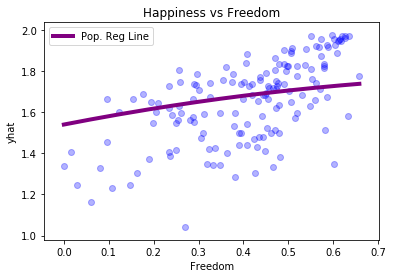

In [15]:
# set the proper variables 
happiness['yhat'] = m5.fittedvalues
happiness['yav'] = m5.params[0] + m5.params[1]*happiness["GDP_per_Capita"].mean() + m5.params[2]*happiness["Family"].mean() + m5.params[3]*happiness["Life_Expectancy"].mean() + m5.params[4]*happiness['Freedom'] +  m5.params[5]*(happiness['Freedom']**2) + m5.params[6]*happiness["Generosity"].mean() + m5.params[3]*happiness["Government_Corruption"].mean()

happiness.sort_values(by=['Freedom'], inplace=True)
sns.regplot("Freedom", "yhat", scatter_kws={"color": "blue", 'alpha': 0.3}, fit_reg=False,
            data=happiness).set_title("Happiness vs Freedom")
# adds the line that shows the quadratic relation
plt.plot(happiness["Freedom"], happiness["yav"], color='purple', linewidth=4, label="Pop. Reg Line")
plt.title("Happiness vs Freedom" )
plt.legend(loc='upper left')
plt.show()

From the graph we see that the relationship is not very quadratic. And there is no such point where happiness starts to decrease as freedom increase. 

## Conclusion
To sum up, we researched on how a country’s happiness level can be predicted by variables, including individual level of freedom, generosity, GDP per Capita, and government corruption in this project. First of all, we studied about the data, and make correction tables to have better understanding of the raw data. Then we proposed economic regreesion models for the question we aim to study, and make stargazer table to summarize the result. Moreover, for visulaization, we made a grapgh for the regression funtion and showed the fitted Reg Line based on model 5, which indicate the increase in happiness with the growth in freedom.

## Reference
“Does Happiness Pay?” Carol Graham, Andrew Eggers, and Sandip Sukhtankar, www.brookings.edu/wp-content/uploads/2012/04/20040603c.

“The Most Inflfluential Factors in Determining the Happiness of Nations.” Julie Lang, 2012, scholarworks.uni.edu/cgi/viewcontent.cgi?article=1093&context=mtie#:~:text=In%20The%20World%20Database%20of,and%20average%20precipitation%20were%20significant.

“Five Levels of Happiness: In Search of the ‘Real’ Thing.” Dr. Jim Taylor, 2020, www.drjimtaylor.com/4.0/five-levels-of-happiness-in-search-of-the-real-thing.

In [16]:
!jupyter nbconvert --to html 320lab-withcode.ipynb

[NbConvertApp] Converting notebook 320lab-withcode.ipynb to html
[NbConvertApp] Writing 784567 bytes to 320lab-withcode.html
